# **Proyecto Orange** 
### **Responsables: Andrés Felipe Ocampo, Alejandra Ruiz y Luis Felipe Montenegro**

# **Sección 1 - Análisis Exploratorio de Datos**

Caracterización de los registros existentes en la base de datos, con el objetivo de aterrizar el dominio del problema. Para esto es necesario:

- Diseño y estructuración de la base de datos
- Generación de gráficos, análisis descriptivo y estadística inferencial (deseable)
- Análisis de correlación univariada
  

In [37]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import f_oneway, levene, shapiro, stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from prince import MCA

In [2]:
#Lectura de datos

df = pd.read_excel('prueba.xlsx', header=8)
pd.set_option('display.max_columns', None)


In [3]:
# Leer encabezados de dimensiones (desde fila 3 a 8)

#Se leen los encabezados de las dimensiones de la encuesta, las cuales se encuentran entre la fila 3 y la 8

df_headers = pd.read_excel('prueba.xlsx', header=None, nrows=8)
dimension_metadata = df_headers.iloc[2:8, :].transpose()
dimension_metadata.columns = ['Dynamic_Capability_Stage', 'Columna_Validar_1', 'Business_Parameters', 'Business_Sub_Parameters', 'Columna_Validar_2', 'Variable_Metrics']


#Se identifica la columna en la que se encuentran las preguntas. 

dimension_metadata_filtered = dimension_metadata.iloc[27:].reset_index(drop=True)
question_columns = df.columns[27:]

# Construir tabla de metadatos

metadata_df = pd.DataFrame({
    'Pregunta_Columna': question_columns
})
metadata_df = pd.concat([metadata_df, dimension_metadata_filtered.reset_index(drop=True)], axis=1)

# Melt Data 

id_vars = df.columns[:27]
value_vars = df.columns[27:]

df_melted = df.melt(id_vars=id_vars, value_vars=value_vars,
                    var_name='Pregunta_Columna', value_name='Respuesta')

# Unir con metadatos

df_final = df_melted.merge(metadata_df, on='Pregunta_Columna', how='left')

# Mostrar la información

print(df_final.head())

  Company  Company_number LT \nLeader of Team)\n \nor\n \nTM \n(Team Member)  \
0     C01               1                                                 LT   
1     C01               1                                                 TM   
2     C02               2                                                 LT   
3     C02               2                                                 TM   
4     C03               3                                                 LT   

     CODE Industry            1 industry/sector: 2 company size  \
0  C01-LT   Manufa             Manufactura, Moda            Big   
1  C01-TM   Manufa             Manufactura, Moda            Big   
2  C02-LT   Servic  Servicios, Comidas y bebidas            Big   
3  C02-TM   Servic  Servicios, Comidas y bebidas            Big   
4  C03-LT   Manufa             Manufactura, Moda            Big   

   3 Age of the company: Age of the company (segment)  \
0                     29                    25+ years   
1 

In [4]:
df_transformado = df_final.copy()


In [5]:
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13776 entries, 0 to 13775
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Company                                        13776 non-null  object 
 1   Company_number                                 13776 non-null  int64  
 2   LT 
Leader of Team)
 
or
 
TM 
(Team Member)   13776 non-null  object 
 3   CODE                                           13776 non-null  object 
 4   Industry                                       13776 non-null  object 
 5   1 industry/sector:                             13776 non-null  object 
 6   2 company size                                 13776 non-null  object 
 7   3 Age of the company:                          13776 non-null  int64  
 8   Age of the company (segment)                   13776 non-null  object 
 9   4 Geographic reach location:                   137

# Análisis Univariado

### Transformación del dataset

In [6]:
# Copia de dataset
df_univariado=df.copy()

# Eliminar duplicados en Company
df_univariado  = df_univariado.drop_duplicates(subset=['Company'])

# Elegir columnas a analizar (5 a la 15)
df_univariado = df_univariado.iloc[:, 5:15]
df_univariado.columns

# Dividir la columna 'industry_sector' en dos nuevas columnas: 'industry' y 'sector'
df_univariado[['industry', 'sector']] = df_univariado['1 industry/sector:'].str.split(', ', n=1, expand=True)

# Cambio de rtipo de variable de Sales
df_univariado['6 new products sales:'] = df_univariado['6 new products sales:'].astype(str).str.replace('.', '', regex=False)
df_univariado['6 new products sales:'] = (
    df_univariado['6 new products sales:']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)
df_univariado

df_univariado.head(5)

<>:18: SyntaxWarning: invalid escape sequence '\$'
<>:18: SyntaxWarning: invalid escape sequence '\$'
C:\Users\1143835519\AppData\Local\Temp\ipykernel_21160\1049564932.py:18: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


,1 industry/sector:,2 company size,3 Age of the company:,Age of the company (segment),4 Geographic reach location:,5 R&D Expenditure (Research and Development):,6 new products sales:,7 Number of patents/innovations:,8 Annual growth:,9 Last Year Sales,industry,sector
0,"Manufactura, Moda",Big,29,25+ years,Regional,2.000000e-02,1.785000e+10,12,0.18,85000000000,Manufactura,Moda
2,"Servicios, Comidas y bebidas",Big,6,5-8 years,National,1.037000e+09,2.835000e+09,8,0.24,94500000000,Servicios,Comidas y bebidas
4,"Manufactura, Moda",Big,8,5-8 years,Local,0.000000e+00,1.320000e+10,4,0.10,110000000000,Manufactura,Moda
6,"Servicios, Transporte y logística",Medium,23,15-25 years,International,1.200000e+09,4.800000e+09,6,0.15,13450000000,Servicios,Transporte y logística
8,"Servicios, Tecnología",Medium,25,15-25 years,National,9.625000e+08,3.850000e+09,4,0.08,19250000000,Servicios,Tecnología


### Industry

In [7]:
df_univariado['industry'].describe()

count              28
unique              3
top       Manufactura
freq               14
Name: industry, dtype: object

In [8]:
tabla_freq=(pd.crosstab(index=df_univariado["industry"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,industry,Freq. Abs.,Freq. Rel.
0,Manufactura,14,0.500000
1,Servicios,8,0.285714
2,Comercio,6,0.214286


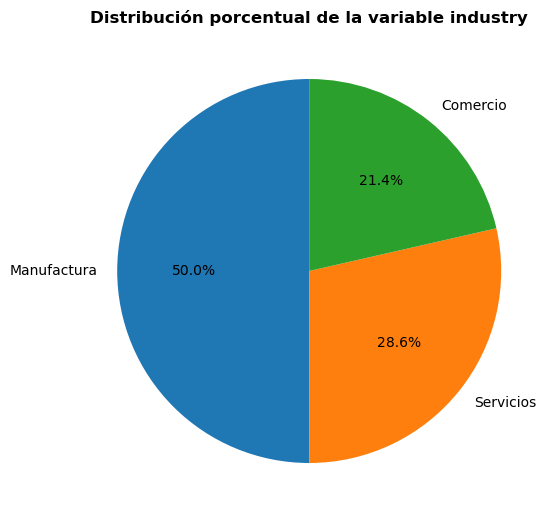

In [9]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["industry"],autopct='%1.1f%%',startangle=90)
plt.title("Distribución porcentual de la variable industry", fontweight='bold')
plt.show()

### Sector

In [10]:
df_univariado['sector'].describe()

count       28
unique      16
top       Moda
freq         8
Name: sector, dtype: object

In [11]:
tabla_freq=(pd.crosstab(index=df_univariado["sector"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,sector,Freq. Abs.,Freq. Rel.
0,Moda,8,0.285714
1,Construcción,4,0.142857
2,Comidas y bebidas,2,0.071429
3,Educación,2,0.071429
4,Automotor,1,0.035714
5,Belleza y cuidado personal,1,0.035714
6,Deportes,1,0.035714
7,Empaques,1,0.035714
8,Energía,1,0.035714
9,Ferroelectrico,1,0.035714


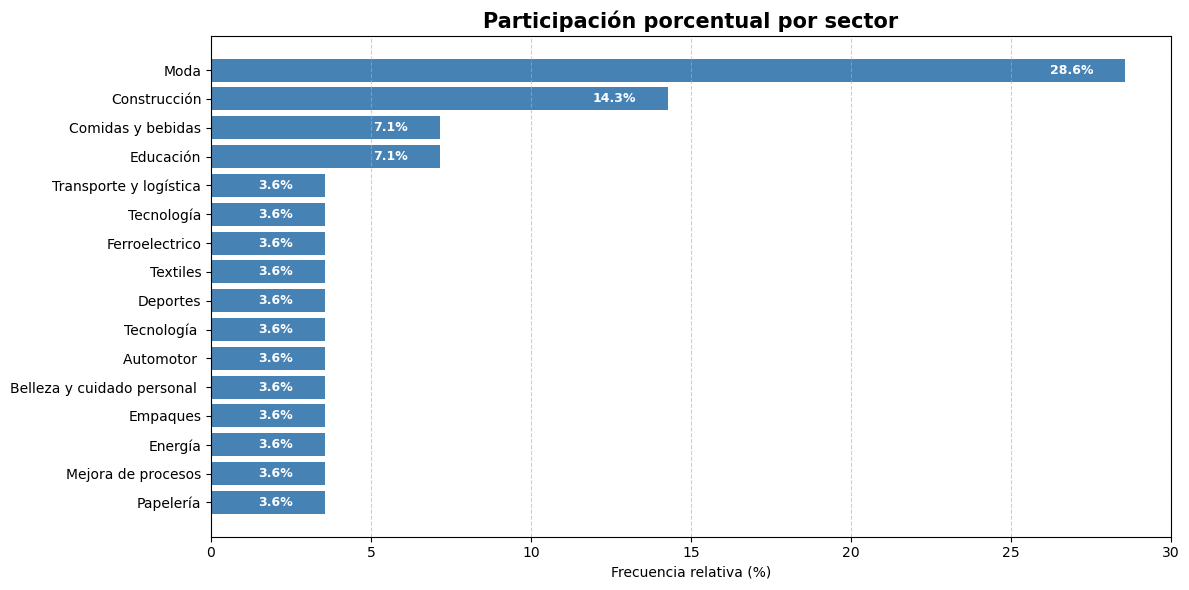

In [12]:
# Recalcular sector_freq_sorted por si se perdió en el contexto
sector_freq = df_univariado['sector'].value_counts().reset_index()
sector_freq.columns = ['sector', 'frecuencia_absoluta']
sector_freq['frecuencia_relativa'] = sector_freq['frecuencia_absoluta'] / sector_freq['frecuencia_absoluta'].sum()
sector_freq_sorted = sector_freq.sort_values(by="frecuencia_relativa", ascending=False)

# Crear el gráfico de barras con etiquetas al extremo derecho y en color blanco
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(
    sector_freq_sorted["sector"],
    sector_freq_sorted["frecuencia_relativa"] * 100,
    color="#4682B4"
)

# Añadir etiquetas en blanco al final de cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2,
            f"{width:.1f}%", va='center', ha='right', color='white', fontsize=9, fontweight='bold')

# Configuración estética
ax.set_xlabel("Frecuencia relativa (%)")
ax.set_title("Participación porcentual por sector", fontsize=15, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Age de la empresa

In [13]:
df_univariado['3 Age of the company:'].describe()

count    28.000000
mean     19.142857
std      12.270755
min       5.000000
25%       7.750000
50%      17.500000
75%      25.500000
max      47.000000
Name: 3 Age of the company:, dtype: float64

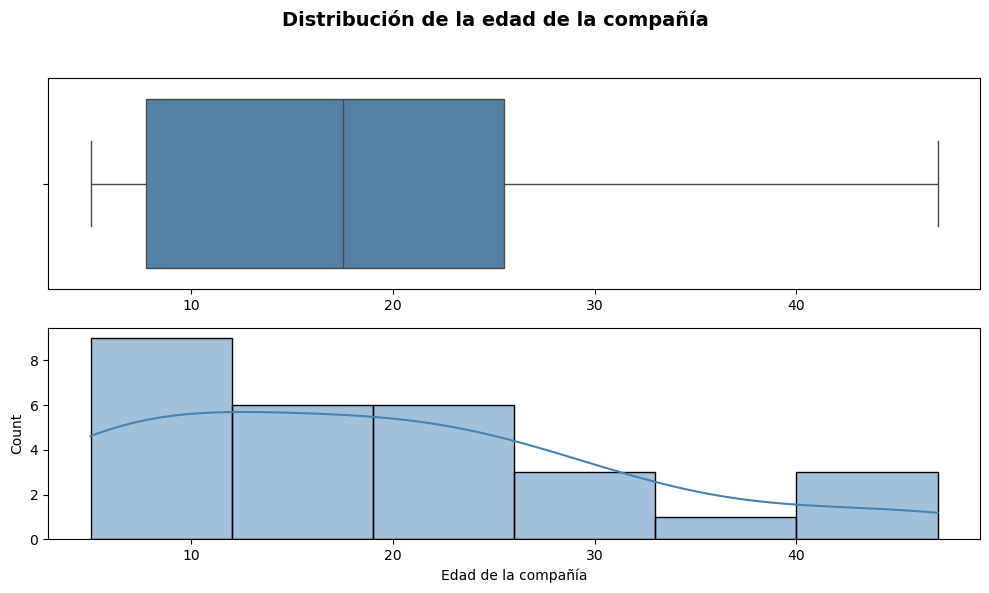

In [14]:
# Crear figura con dos subgráficos (uno para boxplot y otro para histograma)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución de la edad de la compañía",
             fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(x=df_univariado['3 Age of the company:'], color="steelblue", ax=axs[0])
axs[0].set_xlabel("")
#axs[0].set_title("Boxplot")

# Histograma con KDE
sns.histplot(df_univariado['3 Age of the company:'], kde=True, color="steelblue", ax=axs[1])
axs[1].set_xlabel("Edad de la compañía")
#axs[1].set_title("Histograma con KDE")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título principal
plt.show()

### Age of the company (segment)

In [15]:
df_univariado['Age of the company (segment)'].value_counts()

Age of the company (segment)
15-25 years    10
25+ years       8
5-8 years       8
8-15 years      2
Name: count, dtype: int64

In [16]:
df_univariado['Age of the company (segment)'].describe()

count              28
unique              4
top       15-25 years
freq               10
Name: Age of the company (segment), dtype: object

In [17]:
tabla_freq=(pd.crosstab(index=df_univariado["Age of the company (segment)"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,Age of the company (segment),Freq. Abs.,Freq. Rel.
0,15-25 years,10,0.357143
1,25+ years,8,0.285714
2,5-8 years,8,0.285714
3,8-15 years,2,0.071429


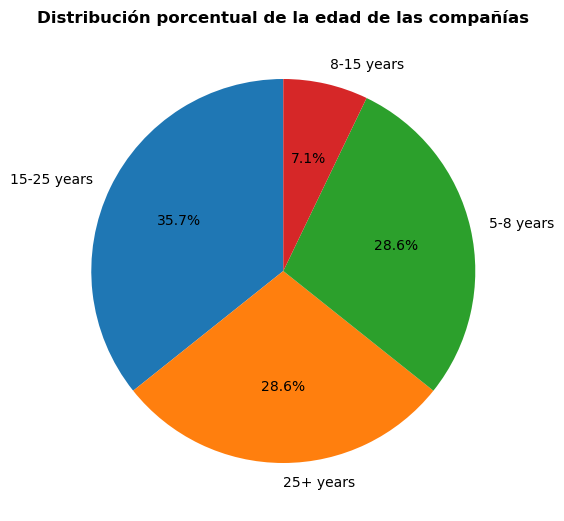

In [18]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["Age of the company (segment)"],autopct='%1.1f%%',startangle=90)
plt.title("Distribución porcentual de la edad de las compañías", fontweight='bold')
plt.show()

### Ubicación geográfica de la compañía

In [19]:
df_univariado['4 Geographic reach location:'].describe()

count        28
unique        4
top       Local
freq         14
Name: 4 Geographic reach location:, dtype: object

In [20]:
tabla_freq=(pd.crosstab(index=df_univariado["4 Geographic reach location:"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,4 Geographic reach location:,Freq. Abs.,Freq. Rel.
0,Local,14,0.500000
1,National,9,0.321429
2,International,3,0.107143
3,Regional,2,0.071429


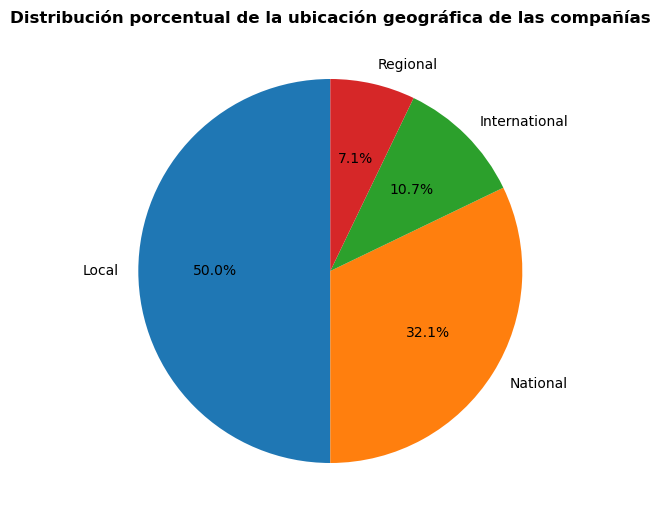

In [21]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["4 Geographic reach location:"],autopct='%1.1f%%',startangle=90)
plt.title("Distribución porcentual de la ubicación geográfica de las compañías", fontweight='bold')
plt.show()

In [22]:
###

In [23]:
df_univariado['3 Age of the company:'].describe()

count    28.000000
mean     19.142857
std      12.270755
min       5.000000
25%       7.750000
50%      17.500000
75%      25.500000
max      47.000000
Name: 3 Age of the company:, dtype: float64

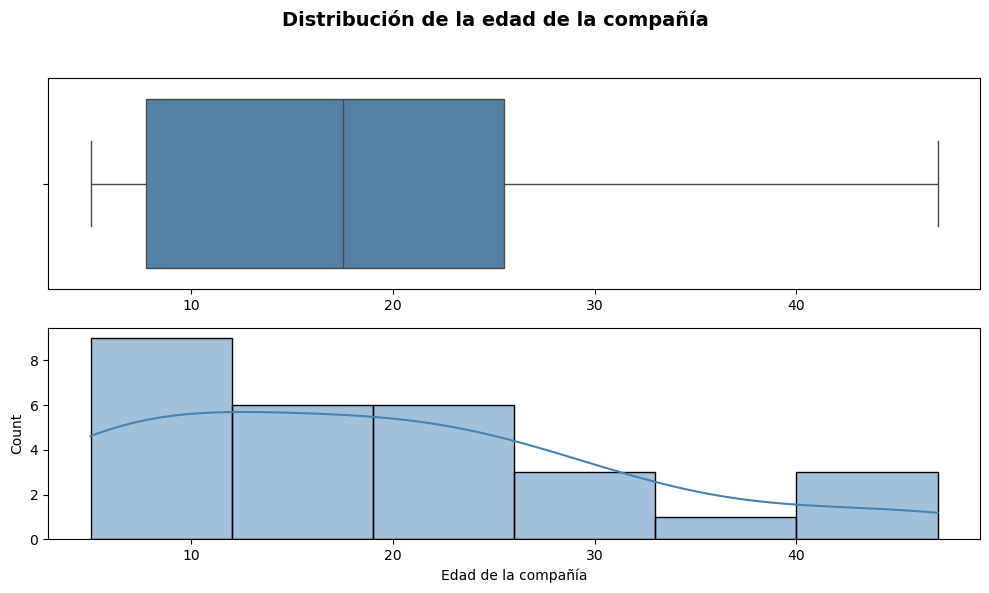

In [24]:
# Crear figura con dos subgráficos (uno para boxplot y otro para histograma)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución de la edad de la compañía",
             fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(x=df_univariado['3 Age of the company:'], color="steelblue", ax=axs[0])
axs[0].set_xlabel("")
#axs[0].set_title("Boxplot")

# Histograma con KDE
sns.histplot(df_univariado['3 Age of the company:'], kde=True, color="steelblue", ax=axs[1])
axs[1].set_xlabel("Edad de la compañía")
#axs[1].set_title("Histograma con KDE")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título principal
plt.show()

### Gastos en I+D

In [25]:
df_univariado.columns

Index(['1 industry/sector:', '2 company size', '3 Age of the company:',
       'Age of the company (segment)', '4 Geographic reach location:',
       '5 R&D Expenditure (Research and Development):',
       '6 new products sales:', '7 Number of patents/innovations:',
       '8 Annual growth:', '9 Last Year Sales', 'industry', 'sector'],
      dtype='object')

In [26]:
df_univariado['5 R&D Expenditure (Research and Development):'].describe()

count    2.800000e+01
mean     2.495464e+08
std      4.283261e+08
min      0.000000e+00
25%      0.000000e+00
50%      7.250000e+07
75%      1.211250e+08
max      1.424000e+09
Name: 5 R&D Expenditure (Research and Development):, dtype: float64

In [27]:
df_univariado

,1 industry/sector:,2 company size,3 Age of the company:,Age of the company (segment),4 Geographic reach location:,5 R&D Expenditure (Research and Development):,6 new products sales:,7 Number of patents/innovations:,8 Annual growth:,9 Last Year Sales,industry,sector
0,"Manufactura, Moda",Big,29,25+ years,Regional,2.000000e-02,1.785000e+10,12,0.18,85000000000,Manufactura,Moda
2,"Servicios, Comidas y bebidas",Big,6,5-8 years,National,1.037000e+09,2.835000e+09,8,0.24,94500000000,Servicios,Comidas y bebidas
4,"Manufactura, Moda",Big,8,5-8 years,Local,0.000000e+00,1.320000e+10,4,0.10,110000000000,Manufactura,Moda
6,"Servicios, Transporte y logística",Medium,23,15-25 years,International,1.200000e+09,4.800000e+09,6,0.15,13450000000,Servicios,Transporte y logística
8,"Servicios, Tecnología",Medium,25,15-25 years,National,9.625000e+08,3.850000e+09,4,0.08,19250000000,Servicios,Tecnología
10,"Manufactura, Construcción",Medium,30,25+ years,National,1.424000e+09,1.780000e+10,4,0.26,71200000000,Manufactura,Construcción
12,"Manufactura, Construcción",Medium,40,25+ years,National,1.000000e+07,3.620077e+10,3,0.20,64000000000,Manufactura,Construcción
14,"Manufactura, Moda",Small,12,8-15 years,National,9.810000e+07,3.270000e+08,3,0.12,3270000000,Manufactura,Moda
16,"Comercio, Ferroelectrico",Big,24,15-25 years,International,1.200000e+08,2.600000e+08,2,0.14,110000000000,Comercio,Ferroelectrico
18,"Manufactura, Moda",Medium,21,15-25 years,Local,1.000000e+08,1.476000e+09,3,-0.03,14760000000,Manufactura,Moda


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Conversión de valores a millones
#df_univariado["5 R&D Expenditure (Research and Development):"] = df_univariado["5 R&D Expenditure (Research and Development):"].astype(int)
#df_univariado['R&D Expenditure (Research and Development) en millones'] = df_univariado['5 R&D Expenditure (Research and Development):'] / 1_000_000

# Crear figura
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución del gasto de I+D de las empresas", fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(
    x=df_univariado['R&D Expenditure (Research and Development) en millones'],
    color="steelblue",
    ax=axs[0]
)
axs[0].set_xlabel("")

# Histograma con KDE
sns.histplot(
    df_univariado['R&D Expenditure (Research and Development) en millones'],
    kde=True,
    color="steelblue",
    ax=axs[1],
    bins=20  # puedes aumentar este número si quieres más barras
)

# Ajustar ticks en el eje X del histograma
min_val = df_univariado['R&D Expenditure (Research and Development) en millones'].min()
max_val = df_univariado['R&D Expenditure (Research and Development) en millones'].max()
step = (max_val - min_val) / 10
axs[1].set_xticks(np.arange(min_val, max_val + step, step))
axs[1].set_xlabel("Gasto en I+D de la compañía (en millones)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Ventas

In [28]:
df_univariado['6 new products sales:'].describe()

count    2.800000e+01
mean     4.657911e+09
std      7.936572e+09
min      0.000000e+00
25%      9.412500e+07
50%      2.118000e+09
75%      4.598438e+09
max      3.620077e+10
Name: 6 new products sales:, dtype: float64

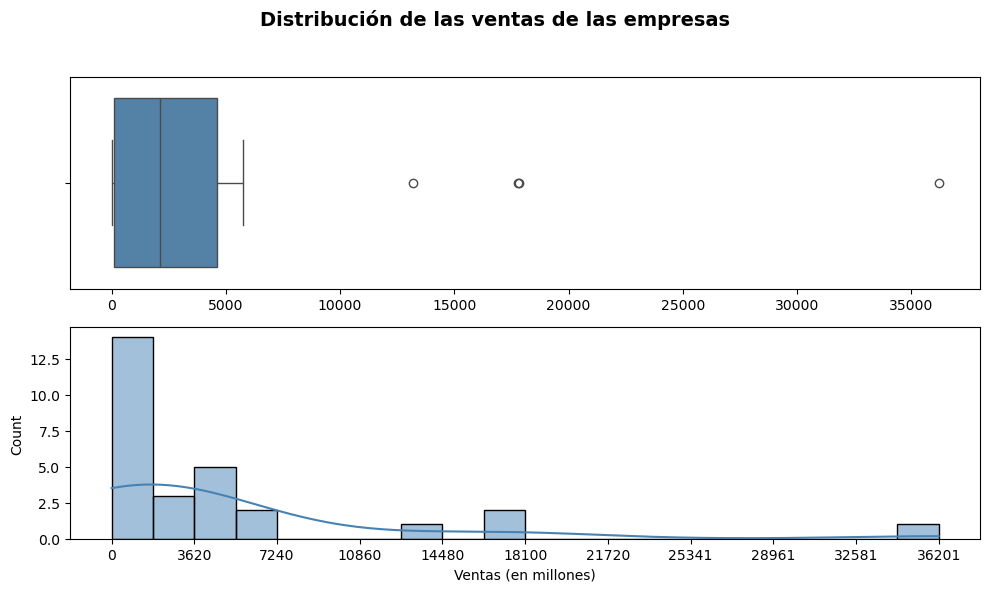

In [29]:
# Conversión de valores a millones
df_univariado['Ventas'] = df_univariado['6 new products sales:'] / 1_000_000

# Crear figura
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución de las ventas de las empresas", fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(
    x=df_univariado['Ventas'],
    color="steelblue",
    ax=axs[0]
)
axs[0].set_xlabel("")

# Histograma con KDE
sns.histplot(
    df_univariado['Ventas'],
    kde=True,
    color="steelblue",
    ax=axs[1],
    bins=20  # puedes aumentar este número si quieres más barras
)

# Ajustar ticks en el eje X del histograma
min_val = df_univariado['Ventas'].min()
max_val = df_univariado['Ventas'].max()
step = (max_val - min_val) / 10
axs[1].set_xticks(np.arange(min_val, max_val + step, step))
axs[1].set_xlabel("Ventas (en millones)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Sección 2 - Aplicación de modelo GRM y análisis bivariados**

## **2.1 Cargue de datos y ajuste de datasets**

In [30]:
# Cargue de datos de resultados del modelo GRM
df_grm=pd.read_excel("indices_grm_dimensiones_estandarizados.xlsx")

# Generación 
df_caracterizacion=df.copy()

# Dividir la columna 'industry_sector' en dos nuevas columnas: 'industry' y 'sector'
df_caracterizacion[['industry', 'sector']] = df_caracterizacion['1 industry/sector:'].str.split(', ', n=1, expand=True)
df_caracterizacion.columns

Index(['Company', 'Company_number',
       'LT \nLeader of Team)\n \nor\n \nTM \n(Team Member)', 'CODE',
       'Industry', '1 industry/sector:', '2 company size',
       '3 Age of the company:', 'Age of the company (segment)',
       '4 Geographic reach location:',
       ...
       'Indicate how often you participate in the development of optimal management solutions, reconfigurations and action plans aimed at customer acquisition.',
       'Please indicate the typical level of certainty you experience when developing optimal management solutions, reconfigurations, and action plans for customer acquisition.',
       'Indicate how often your company evaluates and monitors management's performance and practices against customer acquisition objectives.',
       'Indicate how effective your business is in evaluating and monitoring management performance and practices against customer acquisition objectives.',
       'Indicate how frequently you participate in evaluating and monitoring ma

In [31]:
# Traer al dataset de resultados del modelo GRM las variables de  caracterización de las empresas
df_grm_final = df_grm.merge(
    df_caracterizacion[['CODE',"Company",'2 company size',"industry","sector"]],
    on='CODE',
    how='left'
)

In [32]:
df_grm_final

,CODE,Indice_Sensing,Indice_Seizing,Indice_Transformation,Indice_Sensing_Z,Indice_Seizing_Z,Indice_Transformation_Z,Company,2 company size,industry,sector
0,C01-LT,1.584394,1.302203,1.820393,1.584908,1.307669,1.822736,C01,Big,Manufactura,Moda
1,C01-TM,1.613900,1.308076,1.837790,1.614417,1.313544,1.840152,C01,Big,Manufactura,Moda
2,C02-LT,0.475348,0.439359,0.792505,0.475718,0.444613,0.793801,C02,Big,Servicios,Comidas y bebidas
3,C02-TM,0.515720,0.432376,0.798164,0.516096,0.437629,0.799466,C02,Big,Servicios,Comidas y bebidas
4,C03-LT,0.421892,0.641390,0.577742,0.422256,0.646694,0.578820,C03,Big,Manufactura,Moda
5,C03-TM,2.710571,2.765776,2.698105,2.711230,2.771601,2.701344,C03,Big,Manufactura,Moda
6,C04-LT,-1.184263,-0.277212,-0.871277,-1.184107,-0.272134,-0.871677,C04,Medium,Servicios,Transporte y logística
7,C04-TM,0.249838,-0.525276,0.207694,0.250180,-0.520258,0.208394,C04,Medium,Servicios,Transporte y logística
8,C05-LT,-0.225619,0.316392,0.478978,-0.225338,0.321617,0.479954,C05,Medium,Servicios,Tecnología
9,C05-TM,0.862627,0.750814,0.317241,0.863048,0.756145,0.318053,C05,Medium,Servicios,Tecnología


In [33]:
# Promediar los valores de variables latentes por cada compañía
# Agrupar por empresa y calcular promedios de los índices latentes y sus z-scores
df_promedio_empresa = df_grm_final.groupby('Company').agg({
    'Indice_Sensing': 'mean',
    'Indice_Seizing': 'mean',
    'Indice_Transformation': 'mean',
    'Indice_Sensing_Z': 'mean',
    'Indice_Seizing_Z': 'mean',
    'Indice_Transformation_Z': 'mean',
    '2 company size': 'first',
    'industry': 'first',
    'sector': 'first'
}).reset_index()

## **2.2 Análisis bivariados**

### **Tamaño de la empresa**

#### **Comprobación de normalidad de los datos**

In [34]:
# Aplicar Shapiro-Wilk a cada grupo
for group in df_promedio_empresa['2 company size'].unique():
    datos_grupo = df_promedio_empresa[df_promedio_empresa['2 company size'] == group]['Indice_Sensing']
    stat, p = shapiro(datos_grupo)
    print(f"\nGrupo: {group}")
    print(f"Estadístico Shapiro-Wilk: {stat:.4f}, p-valor: {p:.4f}")
    if p < 0.05:
        print("→ No es normal (rechaza H0)")
    else:
        print("→ Normal (no rechaza H0)")


Grupo: Big
Estadístico Shapiro-Wilk: 0.9166, p-valor: 0.5178
→ Normal (no rechaza H0)

Grupo: Medium
Estadístico Shapiro-Wilk: 0.9561, p-valor: 0.6249
→ Normal (no rechaza H0)

Grupo: Small
Estadístico Shapiro-Wilk: 0.9295, p-valor: 0.5929
→ Normal (no rechaza H0)

Grupo: Micro
Estadístico Shapiro-Wilk: 0.9628, p-valor: 0.7965
→ Normal (no rechaza H0)


#### **Comprobación de homogeneidad de varianzas**

In [35]:
# Agrupar los datos por grupo
grupos = df_promedio_empresa['2 company size'].unique()
datos_por_grupo = [df_promedio_empresa[df_promedio_empresa['2 company size'] == g]['Indice_Sensing'] for g in grupos]

# Aplicar prueba de Levene
stat, p = levene(*datos_por_grupo)
print(f"Estadístico Levene: {stat:.4f}, p-valor: {p:.4f}")

if p < 0.05:
    print("→ Varianzas diferentes (rechaza H0)")
else:
    print("→ Varianzas iguales (no rechaza H0)")

Estadístico Levene: 0.9367, p-valor: 0.4383
→ Varianzas iguales (no rechaza H0)


#### **Aplicación de pruebas estadísticas para revisión de diferencias entre medianas**


Resultados ANOVA clásica:
F-statistic: 12.5298
P-value: 0.0000

ANOVA es significativa (p < 0.05). Aplicando prueba de Tukey...


C:\Users\1143835519\AppData\Local\Temp\ipykernel_21160\2185718831.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, ax=ax[0], palette="Set2", order=orden_categorias)


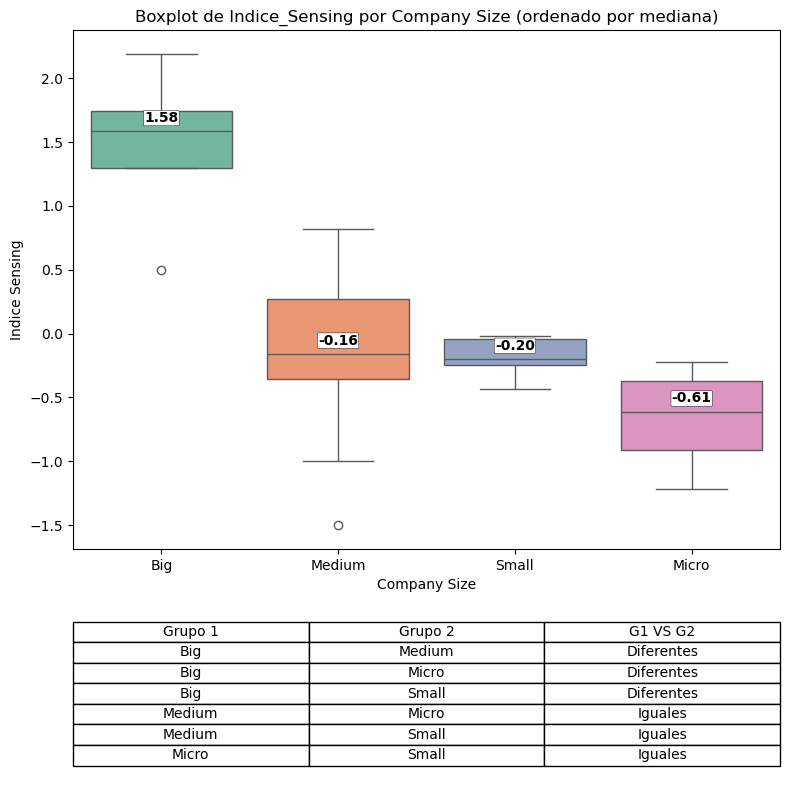

In [36]:
# 1. ANOVA clásica
groups = df_promedio_empresa.groupby('2 company size')['Indice_Sensing'].apply(list)
f_stat, p_value = f_oneway(*groups)

print("\nResultados ANOVA clásica:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 2. Verificar si es significativo
if p_value < 0.05:
    print("\nANOVA es significativa (p < 0.05). Aplicando prueba de Tukey...")

    # 3. Prueba de Tukey post-hoc
    tukey = pairwise_tukeyhsd(endog=df_promedio_empresa['Indice_Sensing'],
                              groups=df_promedio_empresa['2 company size'],
                              alpha=0.05)
    tukey_summary = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    tukey_summary['Interpretacion'] = tukey_summary['p-adj'].apply(lambda x: 'Diferentes' if x < 0.05 else 'Iguales')

    # 4. Calcular medianas por grupo y ordenarlas de mayor a menor
    medianas = df_promedio_empresa.groupby('2 company size')['Indice_Sensing'].median().reset_index()
    orden_categorias = medianas.sort_values('Indice_Sensing', ascending=False)['2 company size'].tolist()

    # 5. Crear figura (boxplot + tabla)
    fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})

    sns.boxplot(x='2 company size', y='Indice_Sensing', data=df_promedio_empresa, ax=ax[0], palette="Set2", order=orden_categorias)
    ax[0].set_title("Boxplot de Indice_Sensing por Company Size (ordenado por mediana)")
    ax[0].set_xlabel("Company Size")
    ax[0].set_ylabel("Indice Sensing")

    # Anotar las medianas con cuadro pequeño
    for i, row in medianas.iterrows():
        idx = orden_categorias.index(row['2 company size'])
        offset = 0.05
        ax[0].text(idx, row['Indice_Sensing'] + offset, 
                   f"{row['Indice_Sensing']:.2f}", 
                   ha='center', va='bottom', fontweight='bold', color='black',
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.05', linewidth=0.3))

    # 6. Tabla debajo del gráfico
    tabla = tukey_summary[['group1', 'group2', 'Interpretacion']]
    ax[1].axis('off')
    tabla_text = tabla.values.tolist()
    col_labels = ['Grupo 1', 'Grupo 2', 'G1 VS G2']
    ax[1].table(cellText=tabla_text, colLabels=col_labels, loc='center', cellLoc='center')

    plt.tight_layout()
    plt.show()

else:
    print("\nANOVA no es significativa (p >= 0.05). No se aplicará prueba de Tukey ni se generará la gráfica.")